In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive

/content/gdrive/MyDrive


In [ ]:
!pwd

/content


In [7]:
!git clone https://github.com/chulminkw/DLCV.git

fatal: destination path 'DLCV' already exists and is not an empty directory.


In [8]:
!pip install selectivesearch

img shape: (450, 375, 3)
img type: <class 'numpy.ndarray'>

rgb: [[[ 85  85  85]
  [ 84  84  84]
  [ 75  75  75]
  ...
  [212 212 212]
  [215 215 215]
  [218 218 218]]

 [[ 83  83  83]
  [ 82  82  82]
  [ 73  73  73]
  ...
  [216 216 216]
  [220 220 220]
  [223 223 223]]

 [[ 80  80  80]
  [ 79  79  79]
  [ 71  71  71]
  ...
  [219 219 219]
  [225 225 225]
  [228 228 228]]

 ...

 [[214 214 214]
  [211 211 211]
  [213 213 213]
  ...
  [104 104 104]
  [112 112 112]
  [115 115 115]]

 [[221 221 221]
  [214 214 214]
  [215 215 215]
  ...
  [104 104 104]
  [105 105 105]
  [111 111 111]]

 [[237 237 237]
  [230 230 230]
  [230 230 230]
  ...
  [ 97  97  97]
  [ 97  97  97]
  [107 107 107]]]
rgb type: <class 'numpy.ndarray'>


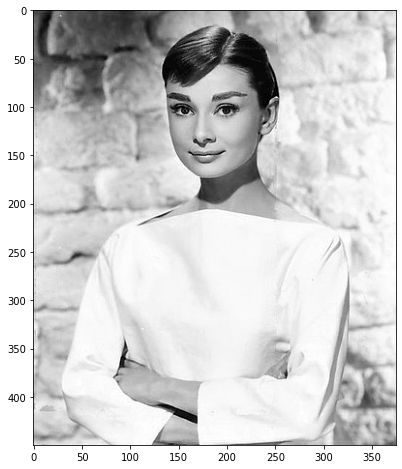

In [9]:
import selectivesearch
import cv2
import matplotlib.pyplot as plt
import os
%matplotlib inline

default_dir = '/content/DLCV'
# os.path.join : 경로 병합

img = cv2.imread(os.path.join(default_dir, 'data/image/audrey01.jpg'))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # OpenCV는 RGB가 아닌 BGR순으로 되어 있음. 그러므로 BGR->RGB로 바꾸기 for matplotlib으로 이미지 로드하기 위해
print('img shape:', img.shape) # img는 OpenCV에서 로드한 것이기 때문 BGR순으로 되어 있음
print('img type:', type(img))
print()
print('rgb:', img_rgb)
print('rgb type:', type(img_rgb))

plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)  # img_rgb 는 nd-array 형태임
plt.show()

In [11]:
# selectivesearch의 selective_search() 메소드는 이미지의 Region proposal 정보(추천된 정보)를 반환
# scale : 큰 오브젝트를 할지, 작은 오브젝트를 할지 바운딩 박스시킬 오브젝트의 크기에 따라 조정할 수 있는 값(e.g 오브젝트 크기가 크면 값을 크게 주나..?)
# min_size : 추천해주는 영역 중 min_size 보다는 큰 바운딩 박스를 추천(e.g 2000 = 바운딩 박스 사각형 넓이)
# regions에 바운딩 박스값들이 모두 반환됨
_, regions = selectivesearch.selective_search(img_rgb, scale=100, min_size=2000)

print(type(regions), len(regions))

<class 'list'> 41


In [13]:
# e.g) rect: (15, 0, 129, 110) -> 좌상돤 x,y좌표가 (15,0)이고 width=129, height=110인 바운딩 박스
# size : 바운딩 박스의 크기
# labels : 해당 바운딩 박스내의 오브젝트들의 고유 id
# 아래로 내려갈수록 너비와 높이 값이 큰 바운딩 박스가 나오며 끝의 바운딩 박스에 여러개의 오브젝트가 같이 있을 확률이 커짐
regions[:10]

[{'labels': [0.0], 'rect': (0, 0, 107, 167), 'size': 11166},
 {'labels': [1.0], 'rect': (15, 0, 129, 110), 'size': 8771},
 {'labels': [2.0], 'rect': (121, 0, 253, 133), 'size': 17442},
 {'labels': [3.0], 'rect': (134, 17, 73, 62), 'size': 2713},
 {'labels': [4.0], 'rect': (166, 23, 87, 176), 'size': 8639},
 {'labels': [5.0], 'rect': (136, 53, 88, 121), 'size': 4617},
 {'labels': [6.0], 'rect': (232, 79, 117, 147), 'size': 7701},
 {'labels': [7.0], 'rect': (50, 91, 133, 123), 'size': 7042},
 {'labels': [8.0], 'rect': (305, 97, 69, 283), 'size': 11373},
 {'labels': [9.0], 'rect': (0, 161, 70, 46), 'size': 2363}]

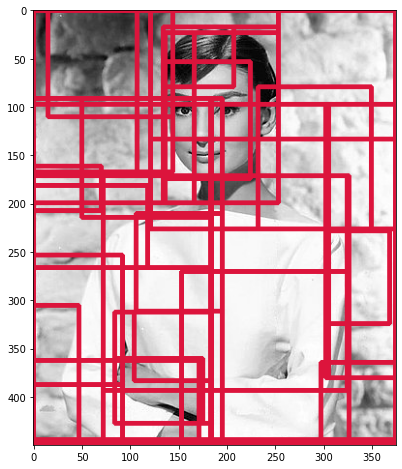

In [14]:
# rect 정보만 출력해 바운딩박스의 좌표와 너비, 높이 살펴보기
cand_rects = [cand['rect'] for cand in regions]

# openCV의 rectangle() 메소드를 이용해 바운딩박스 시각화하기
# rectangle() 인자로 이미지, 이미지의 좌상단 좌표, 우하단 좌표, box컬러색, 두께 등을 인자로 입력

red_rgb = (220,20,60)  # 바운딩 박스 색깔
img_rgb_copy = img_rgb.copy()
for rect in cand_rects:

  left = rect[0]  # 좌상단 x좌표
  top = rect[1]  # 좌상단 y좌표
  right = left + rect[2] # 우하단 x좌표
  bottom = top + rect[3]  # 우하단 y좌표

  img_rgb_copy = cv2.rectangle(img_rgb_copy, (left, top), (right, bottom),
                               color=red_rgb, thickness=3)

plt.figure(figsize=(8, 8))
plt.imshow(img_rgb_copy)
plt.show()


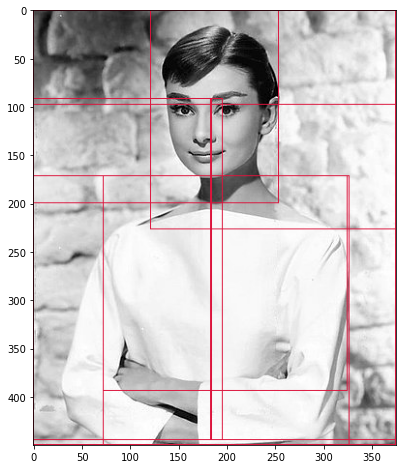

In [16]:
# 바운딩 박스 중 특정 사이즈보다 큰 박스들만 시각화하기
cand_rects = [cand['rect'] for cand in regions if cand['size'] > 21000]

red_rgb = (220,20,60)
img_rgb_copy2 = img_rgb.copy()
for rect in cand_rects:
  left = rect[0]
  top = rect[1]
  right = left + rect[2]
  bottom = top + rect[3]

  img_rgb_copy2 = cv2.rectangle(img_rgb_copy2, (left, top), (right, bottom),
                                color=red_rgb, thickness=1)

plt.figure(figsize=(8, 8))
plt.imshow(img_rgb_copy2)
plt.show()